In [2]:
%run ../scripts/notebook_settings_lean.py
from glob import glob
import os

In [3]:
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering.txt", sep=" ")
meta_data_samples["simple_pop"] = [x.split(",")[0].replace(" ", "_") for x in meta_data_samples.Origin]
meta_data_samples.simple_pop.unique()

array(['Mikumi', 'Aberdare', 'Chunga', 'captive', 'Awash', 'Serengeti',
       'Arusha', 'Ngorongoro', 'Ruaha', 'Gombe', 'Udzungwa', 'Mahale',
       'Katavi', 'Selous', 'Lake_Manyara', 'Tarangire', 'Niokolo-Koba',
       'Issa_Valley', 'Dendro_Park', 'Filoha', 'Gog_Woreda'], dtype=object)

In [4]:
rmaps = glob("../smcpp_pyrho/steps/pyrho/*/[!f]*.rmap")
# Beware that loading all populations is memory-intensive (using 30gb here)

In [5]:
rmaps

['../smcpp_pyrho/steps/pyrho/Serengeti/chr6.rmap',
 '../smcpp_pyrho/steps/pyrho/Serengeti/chr10.rmap',
 '../smcpp_pyrho/steps/pyrho/Serengeti/chr14.rmap',
 '../smcpp_pyrho/steps/pyrho/Serengeti/chr18.rmap',
 '../smcpp_pyrho/steps/pyrho/Serengeti/chr19.rmap',
 '../smcpp_pyrho/steps/pyrho/Serengeti/chr7.rmap',
 '../smcpp_pyrho/steps/pyrho/Serengeti/chr20.rmap',
 '../smcpp_pyrho/steps/pyrho/Serengeti/chr3.rmap',
 '../smcpp_pyrho/steps/pyrho/Serengeti/chr15.rmap',
 '../smcpp_pyrho/steps/pyrho/Serengeti/chrX.rmap',
 '../smcpp_pyrho/steps/pyrho/Serengeti/chr9.rmap',
 '../smcpp_pyrho/steps/pyrho/Serengeti/chr5.rmap',
 '../smcpp_pyrho/steps/pyrho/Serengeti/chr13.rmap',
 '../smcpp_pyrho/steps/pyrho/Serengeti/chr1.rmap',
 '../smcpp_pyrho/steps/pyrho/Serengeti/chr17.rmap',
 '../smcpp_pyrho/steps/pyrho/Serengeti/chr4.rmap',
 '../smcpp_pyrho/steps/pyrho/Serengeti/chr12.rmap',
 '../smcpp_pyrho/steps/pyrho/Serengeti/chr16.rmap',
 '../smcpp_pyrho/steps/pyrho/Serengeti/chr8.rmap',
 '../smcpp_pyrho/step

In [18]:
rmaps = glob("../smcpp_pyrho/steps/pyrho/Mikumi/*2.rmap")
rmaps

['../smcpp_pyrho/steps/pyrho/Mikumi/chr2.rmap',
 '../smcpp_pyrho/steps/pyrho/Mikumi/flat_chr2.rmap',
 '../smcpp_pyrho/steps/pyrho/Mikumi/chr12.rmap']

In [19]:
# Limited run
df_l = []
for m in rmaps:
    size = os.path.getsize(m)
    # Size check, as I had issues with the workflow.
    if size < 100:
        print(m)
        #os.remove(m)
    else:
        print(m.split("/")[-2])
        recomb_df = pd.read_csv(m, sep = "\t", names = ["start", "end", "recomb"])
        recomb_df["chrom"] = m.split("/")[-1].split(".")[0]
        recomb_df["population"] = m.split("/")[-2]
        df_l.append(recomb_df)
all_recombs = pd.concat(df_l)

Mikumi
Mikumi
Mikumi


In [20]:
all_recombs["window_size"] = all_recombs.end-all_recombs.start
all_recombs["genetic_distance"] = all_recombs.window_size*all_recombs.recomb

In [21]:
total_size = 0
for p in all_recombs.population.unique():
    chrom_df = all_recombs.loc[(all_recombs.chrom == "chr20") & (all_recombs.population == p)]
    print(p, chrom_df.window_size.sum(), chrom_df.genetic_distance.sum()*100)

Mikumi 0 0.0


In [22]:
len(meta_data_samples.loc[meta_data_samples.simple_pop == p])

38

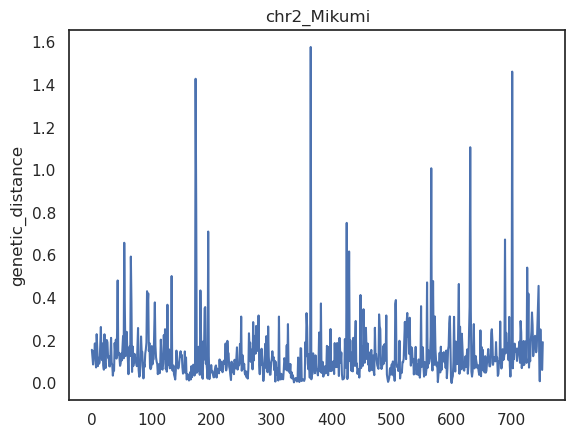

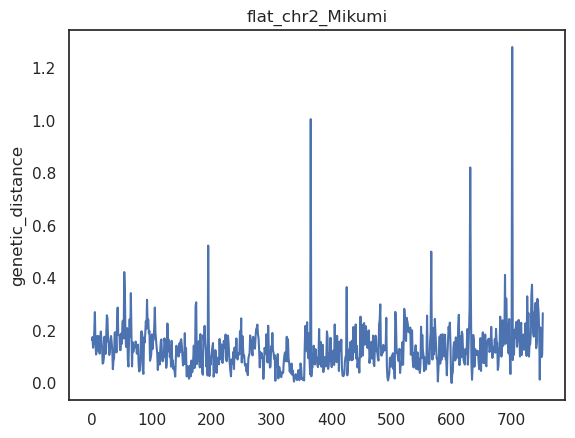

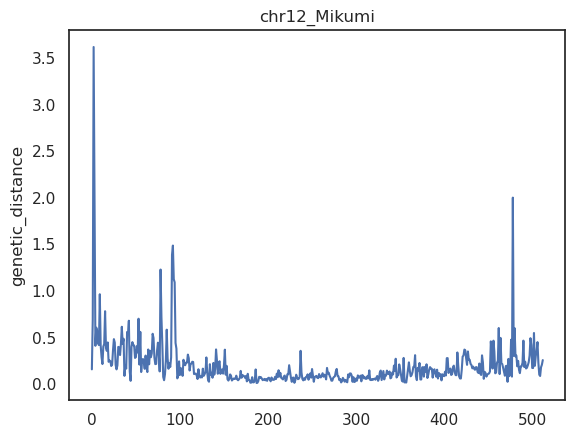

<Figure size 640x480 with 0 Axes>

In [23]:
window_size = 250000
for c in all_recombs.chrom.unique():
    chrom_df = all_recombs.loc[(all_recombs.chrom == c)]
    total_size = chrom_df.genetic_distance.sum()
    window_sums = chrom_df.groupby(pd.cut(chrom_df.start,np.arange\
                                          (0, chrom_df.start.max(), window_size))).sum().genetic_distance*100/total_size
    fig = sns.lineplot(y = window_sums,
                x = list(range(len(window_sums))))
    sample_number = len(meta_data_samples.loc[meta_data_samples.simple_pop == p])
    fig.set(title = "{}_{}".format(c, "Mikumi"))
    plt.figure()

In [11]:
meta_data_samples.Origin.value_counts()

Mikumi, Tanzania                         38
Chunga, Zambia                           27
Gog Woreda, Gambella region, Ethiopia    25
Filoha, Ethiopia                         24
Lake Manyara, Tanzania                   19
Gombe, Tanzania                          17
Serengeti, Tanzania                      14
Niokolo-Koba, Senegal                    12
Mahale, Tanzania                          7
Tarangire, Tanzania                       7
Ngorongoro, Tanzania                      6
Ruaha, Tanzania                           6
Udzungwa, Tanzania                        5
Arusha, Tanzania                          4
Dendro Park, Zambia                       4
Selous, Tanzania                          3
captive                                   2
Awash, Ethiopia                           2
Aberdare, Kenya                           2
Katavi, Tanzania                          2
Issa Valley, Tanzania                     1
Name: Origin, dtype: int64

In [12]:
meta_data_samples.Origin.value_counts().index[:10]

Index(['Mikumi, Tanzania', 'Chunga, Zambia',
       'Gog Woreda, Gambella region, Ethiopia', 'Filoha, Ethiopia',
       'Lake Manyara, Tanzania', 'Gombe, Tanzania', 'Serengeti, Tanzania',
       'Niokolo-Koba, Senegal', 'Mahale, Tanzania', 'Tarangire, Tanzania'],
      dtype='object')

In [15]:
pop_list = ['Dendro_Park','Chunga','Issa_Valley','Mahale','Katavi',
            'Mikumi', 'Selous','Udzungwa', 'Ruaha',
            'Tarangire','Gombe','Serengeti','Arusha', 'Ngorongoro','Lake_Manyara',
          'Awash','Aberdare','Filoha', 'Gog_Woreda','Niokolo-Koba']
pop_list = ['Chunga', 'Mikumi',
            'Filoha', 'Gog_Woreda']
from scipy import stats

In [42]:
all_recombs.chrom.unique()

array(['chr19', 'chr20', 'chr18', 'chr1', 'chr16', 'chr5', 'chr12',
       'chr9', 'chrX', 'chr8', 'chr17', 'chr4', 'chr13', 'chr15', 'chr2',
       'chr11', 'chr6', 'chr14', 'chr3', 'chr10', 'chr7', 'flat_chr2',
       'flat_chr3'], dtype=object)

In [49]:
window_size = 2000000
array = np.zeros((len(pop_list), len(pop_list)))
for i in range(len(pop_list)):
    print(pop_list[i])
    p1 = pop_list[i]
    chrom_df1 = all_recombs.loc[(all_recombs.population == p1)].sort_values(by=["chrom", "start"])
    total_size1 = chrom_df1.genetic_distance.sum()
    window_sums1 = chrom_df1.groupby(["chrom", pd.cut(chrom_df1.start,np.arange\
                                (0, chrom_df.start.max(), window_size))]).sum().genetic_distance*100/total_size1
    print(chrom_df1.chrom.unique())
    for j in range(i):
        p2 = pop_list[j]
        chrom_df2 = all_recombs.loc[(all_recombs.population == p2)].sort_values(by=["chrom", "start"])
        print(p2, chrom_df2.chrom.unique())
        total_size2 = chrom_df2.genetic_distance.sum()
        window_sums2 = chrom_df2.groupby(["chrom", pd.cut(chrom_df2.start,np.arange\
                                (0, chrom_df.start.max(), window_size))]).sum().genetic_distance*100/total_size2
        array[i][j] = (stats.pearsonr(window_sums1, window_sums2)[0])
        array[j][i] = (stats.pearsonr(window_sums1, window_sums2)[0])

Chunga
['chr1' 'chr10' 'chr11' 'chr12' 'chr13' 'chr14' 'chr15' 'chr16' 'chr17'
 'chr18' 'chr19' 'chr2' 'chr20' 'chr3' 'chr4' 'chr5' 'chr6' 'chr7' 'chr8'
 'chr9' 'chrX']
Mikumi
['chr1' 'chr10' 'chr11' 'chr12' 'chr13' 'chr14' 'chr15' 'chr16' 'chr17'
 'chr18' 'chr19' 'chr2' 'chr20' 'chr3' 'chr4' 'chr5' 'chr6' 'chr7' 'chr8'
 'chr9' 'chrX']
Chunga ['chr1' 'chr10' 'chr11' 'chr12' 'chr13' 'chr14' 'chr15' 'chr16' 'chr17'
 'chr18' 'chr19' 'chr2' 'chr20' 'chr3' 'chr4' 'chr5' 'chr6' 'chr7' 'chr8'
 'chr9' 'chrX']
Filoha
['chr1' 'chr10' 'chr11' 'chr12' 'chr13' 'chr14' 'chr15' 'chr16' 'chr17'
 'chr18' 'chr19' 'chr2' 'chr20' 'chr3' 'chr4' 'chr5' 'chr6' 'chr7' 'chr8'
 'chr9' 'chrX']
Chunga ['chr1' 'chr10' 'chr11' 'chr12' 'chr13' 'chr14' 'chr15' 'chr16' 'chr17'
 'chr18' 'chr19' 'chr2' 'chr20' 'chr3' 'chr4' 'chr5' 'chr6' 'chr7' 'chr8'
 'chr9' 'chrX']
Mikumi ['chr1' 'chr10' 'chr11' 'chr12' 'chr13' 'chr14' 'chr15' 'chr16' 'chr17'
 'chr18' 'chr19' 'chr2' 'chr20' 'chr3' 'chr4' 'chr5' 'chr6' 'chr7' 'chr8'
 '

In [65]:
window_sums1.reset_index()

,chrom,start,genetic_distance
0,chr1,"(0, 2000000]",0.143221
1,chr1,"(2000000, 4000000]",0.082406
2,chr1,"(4000000, 6000000]",0.062707
3,chr1,"(6000000, 8000000]",0.061230
4,chr1,"(8000000, 10000000]",0.051094
...,...,...,...
751,chrX,"(62000000, 64000000]",0.218468
752,chrX,"(64000000, 66000000]",0.077686
753,chrX,"(66000000, 68000000]",0.049432
754,chrX,"(68000000, 70000000]",0.040090


<AxesSubplot:xlabel='genetic_distance', ylabel='Count'>

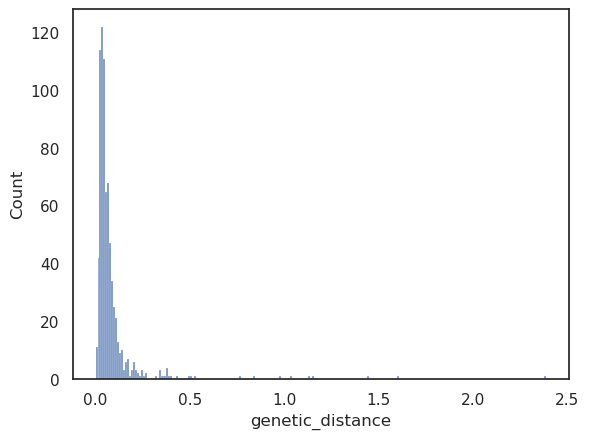

In [56]:
sns.histplot(data=window_sums1.reset_index(), x="genetic_distance")

In [51]:
window_sums2

chrom  start               
chr1   (0, 2000000]            0.005218
       (2000000, 4000000]      0.003829
       (4000000, 6000000]      0.011905
       (6000000, 8000000]      0.002827
       (8000000, 10000000]     0.001981
                                 ...   
chrX   (62000000, 64000000]    0.006253
       (64000000, 66000000]    0.002986
       (66000000, 68000000]    0.002236
       (68000000, 70000000]    0.001325
       (70000000, 72000000]    0.003412
Name: genetic_distance, Length: 756, dtype: float64

<AxesSubplot:>

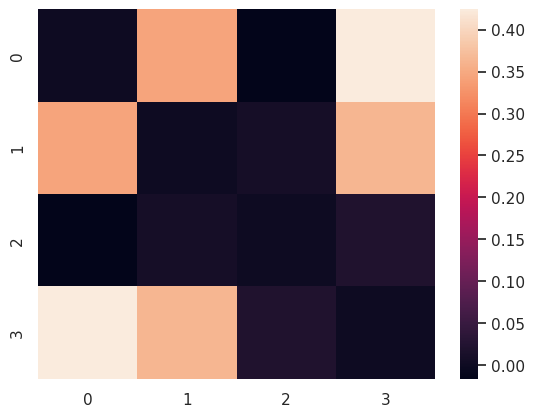

In [52]:
sns.heatmap(data=array)

Small detour: LD check

Region of interest - picking the one with highest recombination in Lake Manyara, which otherwise seems to be a good map.

In [17]:
rmaps = glob("../smcpp_pyrho/steps/pyrho/*/*chr20*.rmap")

df_l = []
for m in rmaps:
    size = os.path.getsize(m)
    # Size check, as I had issues with the workflow.
    if size < 100:
        print(m)
        #os.remove(m)
    else:
        print(m.split("/")[-2])
        recomb_df = pd.read_csv(m, sep = "\t", names = ["start", "end", "recomb"])
        recomb_df["chrom"] = m.split("/")[-1].split(".")[0]
        recomb_df["population"] = m.split("/")[-2]
        df_l.append(recomb_df)
all_recombs = pd.concat(df_l)

Katavi
Mahale
Issa_Valley
Gombe
Awash
Selous
Ngorongoro
Chunga
Tarangire
Lake_Manyara
Dendro_Park
Mikumi
Aberdare
Gog_Woreda
Niokolo-Koba
Arusha
Ruaha
captive
Filoha
Udzungwa
Serengeti


In [19]:
all_recombs["window_size"] = all_recombs.end-all_recombs.start
all_recombs["genetic_distance"] = all_recombs.window_size*all_recombs.recomb

In [20]:
window_size = 100000
chrom_df1 = all_recombs.loc[(all_recombs.chrom == "chr20") & (all_recombs.population == "Lake_Manyara")]
total_size1 = chrom_df1.genetic_distance.sum()
window_sums1 = chrom_df1.groupby(pd.cut(chrom_df1.start,np.arange\
                                (0, chrom_df.start.max(), window_size))).sum().genetic_distance*100/total_size1

In [21]:
window_sums1.sort_values()

start
(49500000, 49600000]    0.000582
(47100000, 47200000]    0.000973
(50800000, 50900000]    0.001352
(49400000, 49500000]    0.001599
(49700000, 49800000]    0.001706
                          ...   
(4900000, 5000000]      0.730887
(14300000, 14400000]    0.736785
(28700000, 28800000]    0.744239
(28900000, 29000000]    0.753775
(1300000, 1400000]      0.845793
Name: genetic_distance, Length: 513, dtype: float64

In [22]:
window_sums1.sort_values()[250:260]

start
(22100000, 22200000]    0.111601
(24900000, 25000000]    0.112213
(15400000, 15500000]    0.112392
(32300000, 32400000]    0.112958
(33000000, 33100000]    0.113678
(50100000, 50200000]    0.113889
(2100000, 2200000]      0.113964
(43400000, 43500000]    0.114262
(37100000, 37200000]    0.114555
(6200000, 6300000]      0.114674
Name: genetic_distance, dtype: float64

In [23]:
import zarr
import allel

In [24]:
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/chr20"
#Opening the zarr data
callset = zarr.open_group(zarr_dir, mode="r")
gt_zarr = allel.GenotypeArray(callset["calldata/GT"])

In [25]:
pos = allel.SortedIndex(callset["variants/POS"])
loc_region = pos.locate_range(1300000, 1400000)
gt_region = allel.GenotypeArray(gt_zarr[loc_region])

In [26]:
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Lake Manyara, Tanzania")].callset_index.values
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > 10)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

array([[2, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 1],
       [1, 2, 1, ..., 1, 2, 1],
       ...,
       [1, 0, 1, ..., 1, 2, 1],
       [1, 0, 1, ..., 1, 2, 1],
       [1, 0, 1, ..., 1, 2, 1]], dtype=int8)

In [27]:
def plot_ld(gn, title):
    m = allel.rogers_huff_r(gn) ** 2
    ax = allel.plot_pairwise_ld(m)
    ax.set_title(title)

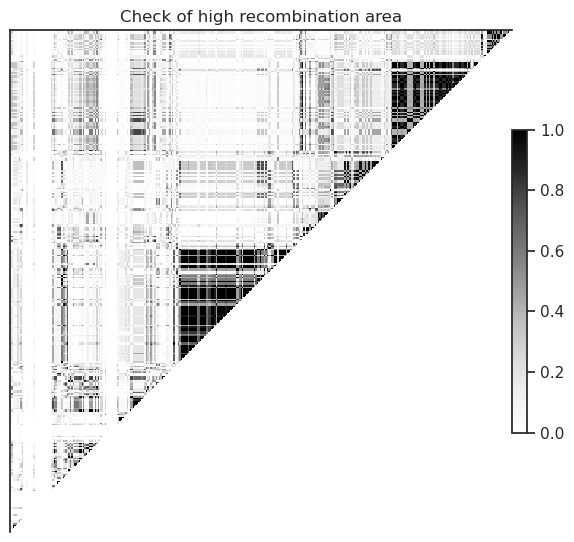

In [28]:
plot_ld(gn[:], 'Check of high recombination area')

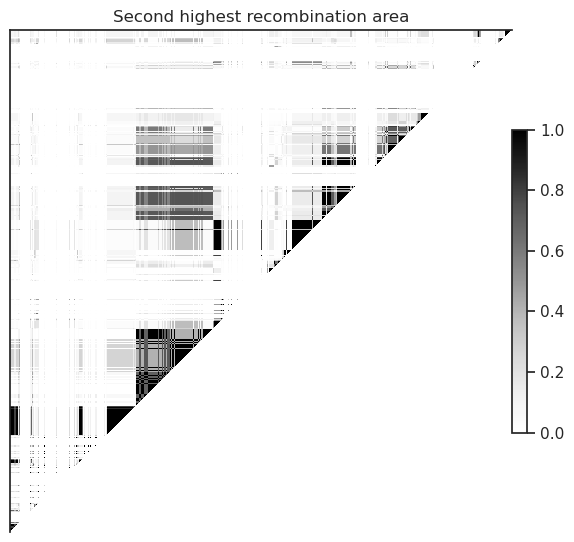

In [29]:
loc_region = pos.locate_range(28900000, 29000000)
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Lake Manyara, Tanzania")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > 10)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
plot_ld(gn[:], 'Second highest recombination area')

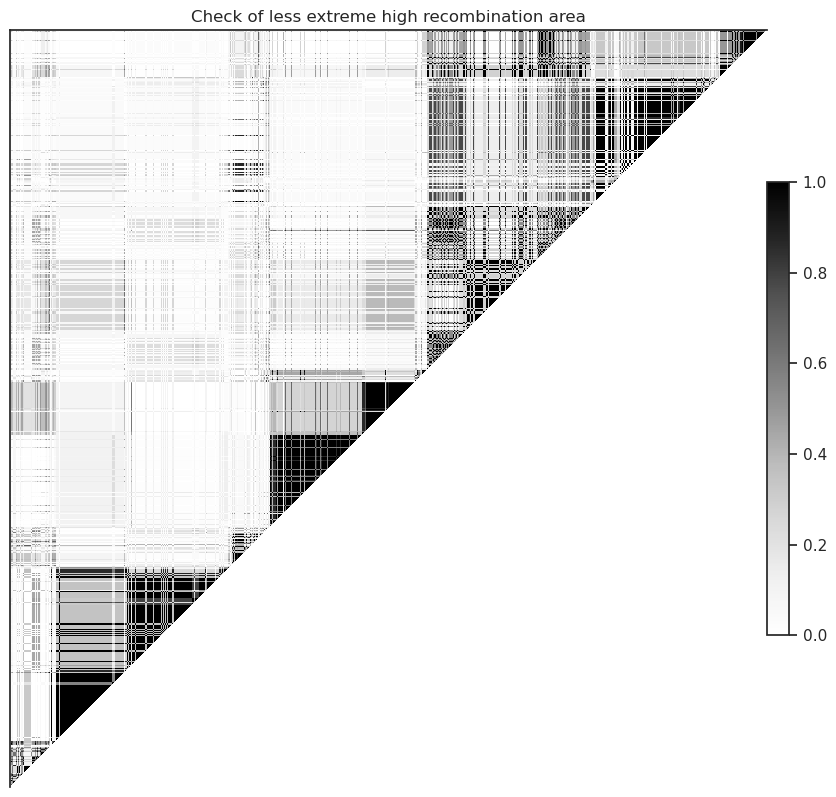

In [30]:
loc_region = pos.locate_range(11900000, 12000000)
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Lake Manyara, Tanzania")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > 10)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
plot_ld(gn[:], 'Check of less extreme high recombination area')

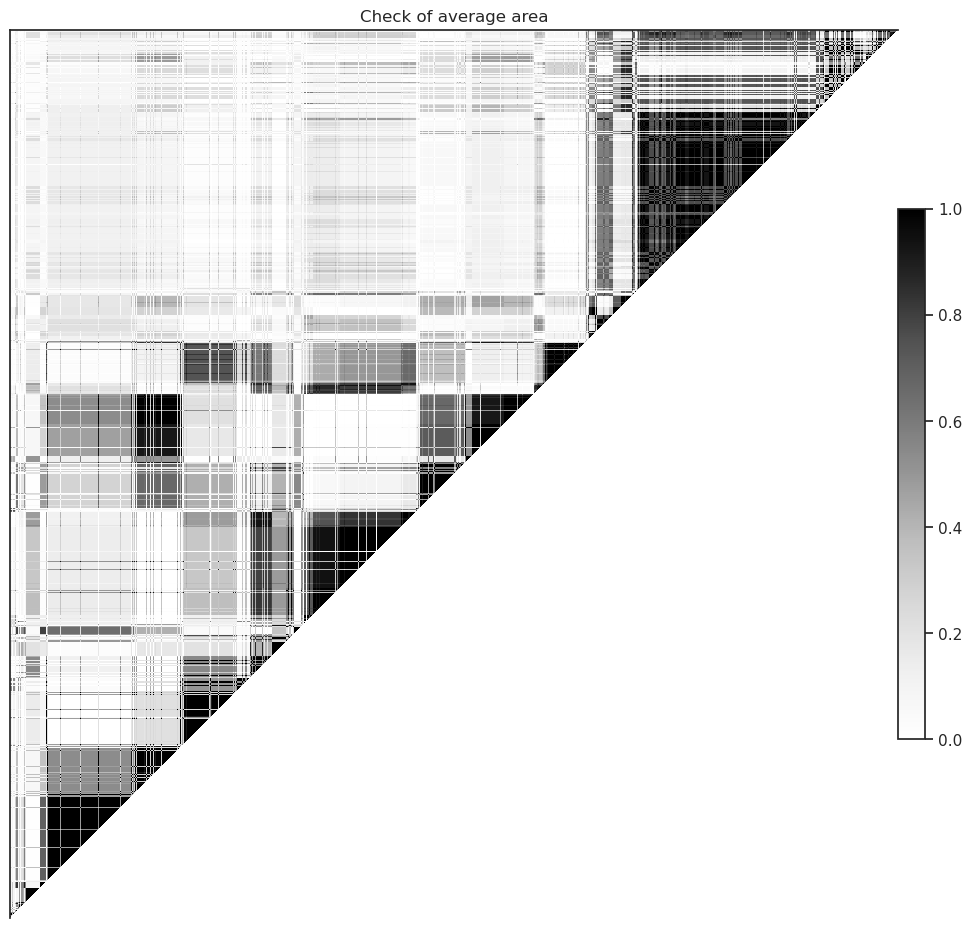

In [31]:
loc_region = pos.locate_range(13000000, 13300000)
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Lake Manyara, Tanzania")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > 10)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
plot_ld(gn[:], 'Check of average area')

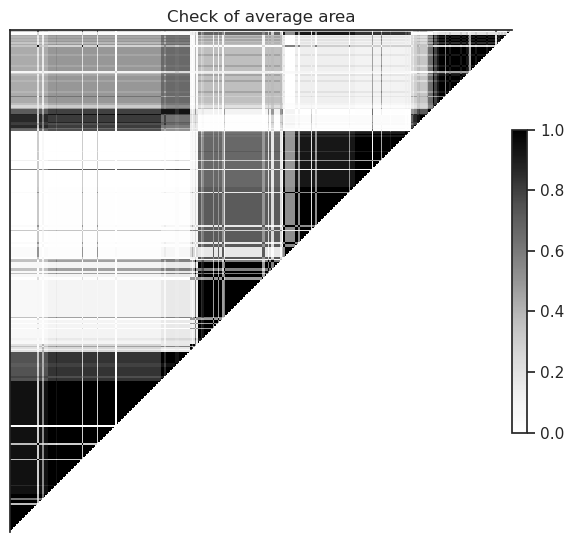

In [32]:
loc_region = pos.locate_range(13100000, 13200000)
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Lake Manyara, Tanzania")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > 10)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
plot_ld(gn[:], 'Check of average area')

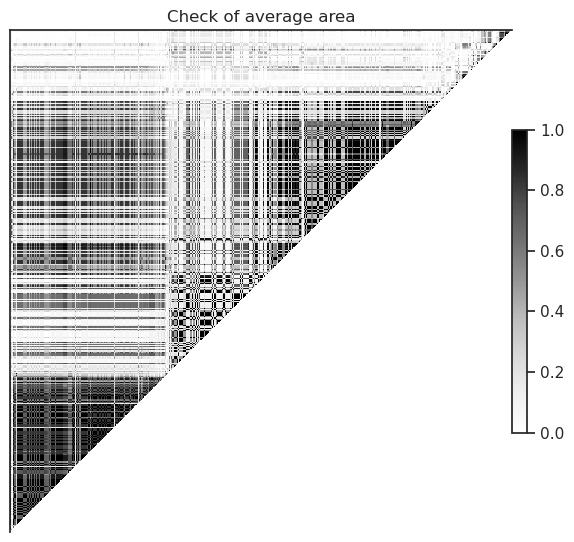

In [33]:
loc_region = pos.locate_range(13100000, 13200000)
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Chunga, Zambia")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > 15)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
plot_ld(gn[:], 'Check of average area')

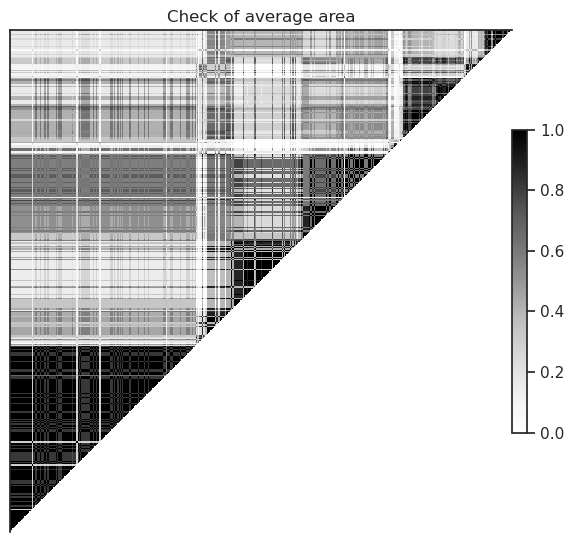

In [34]:
loc_region = pos.locate_range(13100000, 13200000)
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Serengeti, Tanzania")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > 8)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
plot_ld(gn[:], 'Check of average area')

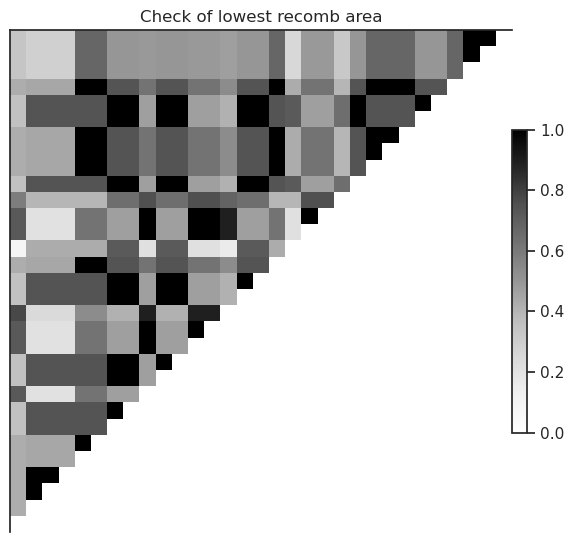

In [35]:
loc_region = pos.locate_range(49500000, 49600000)
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Lake Manyara, Tanzania")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > 10)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
plot_ld(gn[:], 'Check of lowest recomb area')

In [36]:
rmaps = glob("../smcpp_pyrho/steps/pyrho/Chunga/*.rmap")
rmaps

['../smcpp_pyrho/steps/pyrho/Chunga/chr1.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr16.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr5.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr12.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr9.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr8.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr17.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr4.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr13.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr19.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr15.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr2.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr11.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr6.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr20.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr14.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr3.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr10.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr7.rmap',
 '../smcpp_pyrho/steps/pyrho/Chunga/chr18.rmap']

In [37]:
df_l = []
for m in rmaps:
    size = os.path.getsize(m)
    # Size check, as I had issues with the workflow.
    if size < 100:
        print(m)
        #os.remove(m)
    else:
        print(m.split("/")[-2])
        recomb_df = pd.read_csv(m, sep = "\t", names = ["start", "end", "recomb"])
        recomb_df["chrom"] = m.split("/")[-1].split(".")[0]
        recomb_df["population"] = m.split("/")[-2]
        df_l.append(recomb_df)
pop_recombs = pd.concat(df_l)
pop_recombs["window_size"] = pop_recombs.end-pop_recombs.start
pop_recombs["genetic_distance"] = pop_recombs.window_size*pop_recombs.recomb

Chunga
Chunga
Chunga
Chunga
Chunga
Chunga
Chunga
Chunga
Chunga
Chunga
Chunga
Chunga
Chunga
Chunga
Chunga
Chunga
Chunga
Chunga
Chunga
Chunga


In [38]:
total_size = 0
for c in pop_recombs.chrom.unique():
    chrom_df = pop_recombs.loc[(pop_recombs.chrom == c)]
    print(c, chrom_df.window_size.sum(), chrom_df.genetic_distance.sum()*100)

chr1 217458702 2331.9660658929256
chr16 74960419 47.541298788686696
chr5 183742033 136.42544610112168
chr12 128288103 37.22988609654812
chr9 125783770 91.99979870577269
chr8 140340810 334.879164293342
chr17 91392948 1014.5096888702412
chr4 166072952 2598.329788295375
chr13 104988668 75.8979899827502
chr19 51387064 66.2513626179884
chr15 108044240 2479.199399454018
chr2 188277800 287.0327064737654
chr11 132959151 1143.4838758156066
chr6 175396457 162.73102340502706
chr20 72046153 29.13965324577169
chr14 124512048 476.9204051174128
chr3 181338103 895.9980714025864
chr10 91328328 100.07208813046337
chr7 162894161 2005.1325202366304
chr18 72525537 129.98794789315554


In [39]:
pop_recombs

,start,end,recomb,chrom,population,window_size,genetic_distance
0,159,243,7.464819e-08,chr1,Chunga,84,6.270448e-06
1,243,244,7.464819e-08,chr1,Chunga,1,7.464819e-08
2,244,298,7.464819e-08,chr1,Chunga,54,4.031002e-06
3,298,401,7.464819e-08,chr1,Chunga,103,7.688764e-06
4,401,610,7.464819e-08,chr1,Chunga,209,1.560147e-05
...,...,...,...,...,...,...,...
753927,72524885,72524912,3.685760e-07,chr18,Chunga,27,9.951552e-06
753928,72524912,72524913,3.685760e-07,chr18,Chunga,1,3.685760e-07
753929,72524913,72525192,3.685760e-07,chr18,Chunga,279,1.028327e-04
753930,72525192,72525351,3.685760e-07,chr18,Chunga,159,5.860358e-05


/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == "":


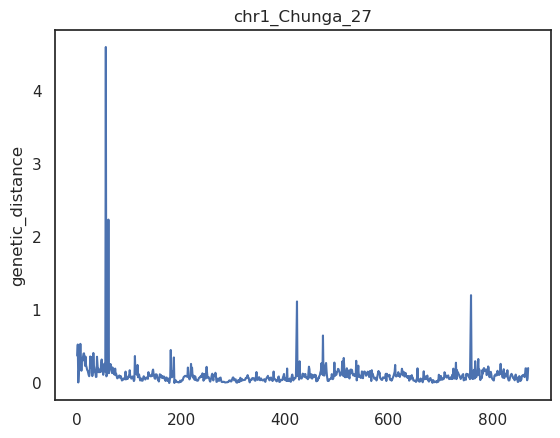

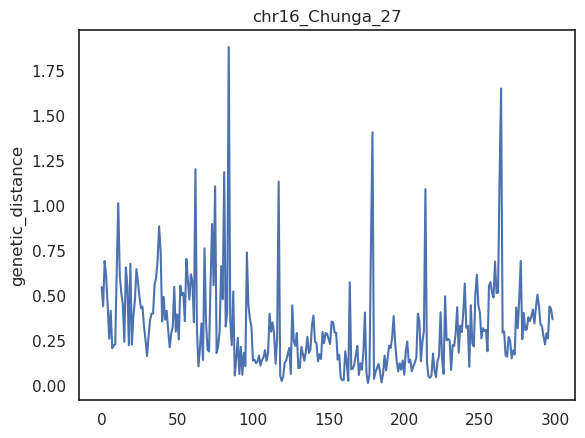

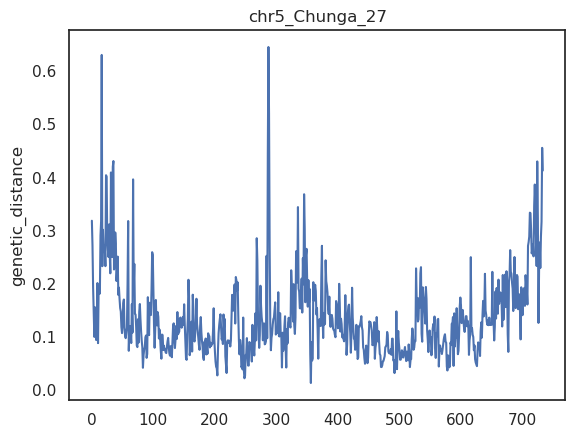

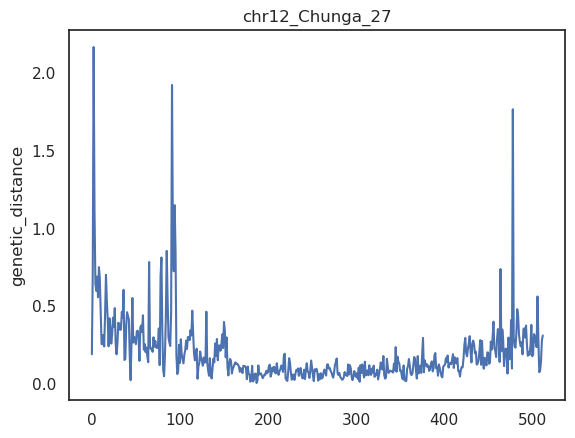

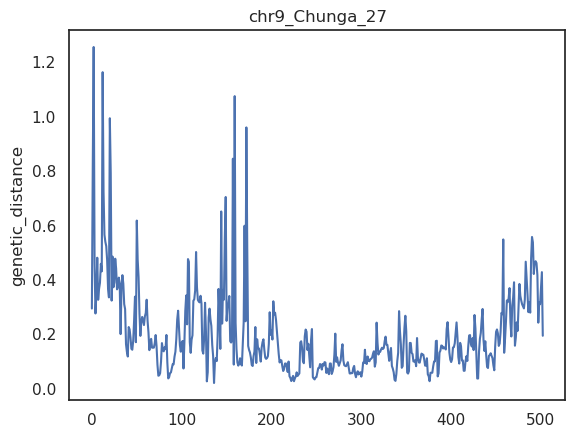

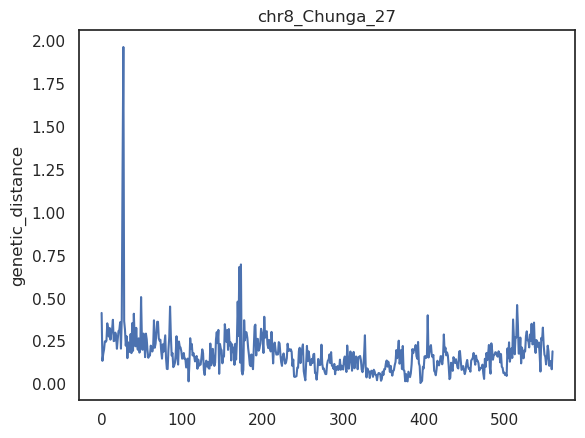

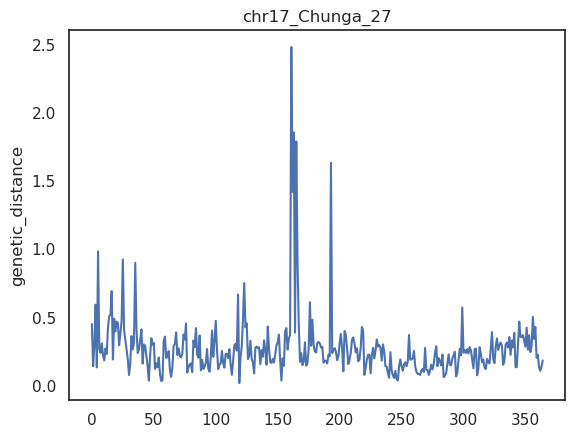

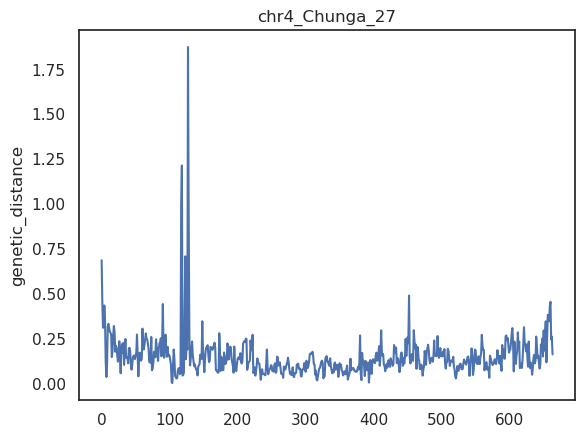

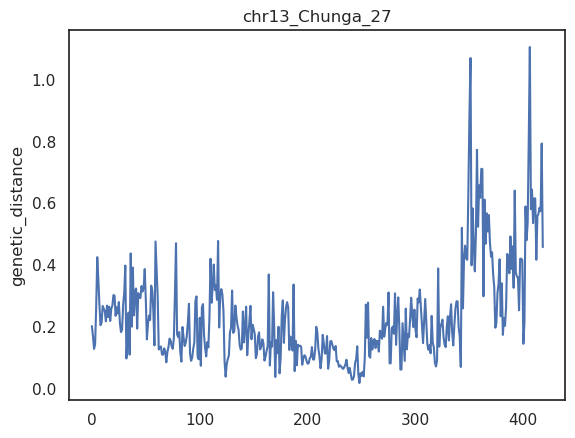

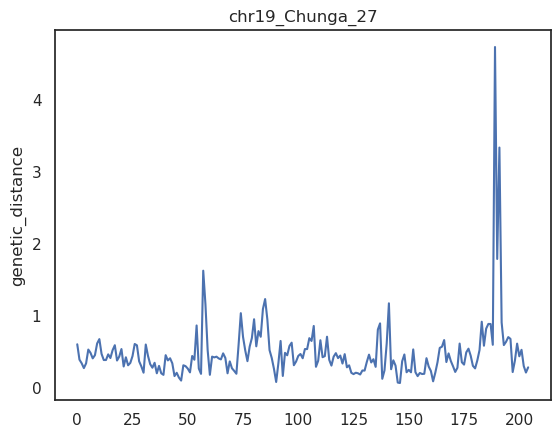

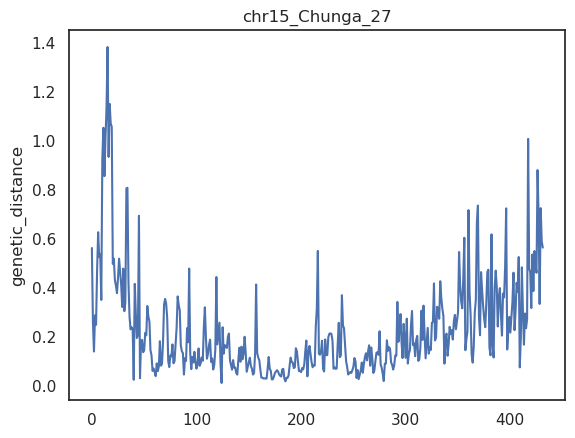

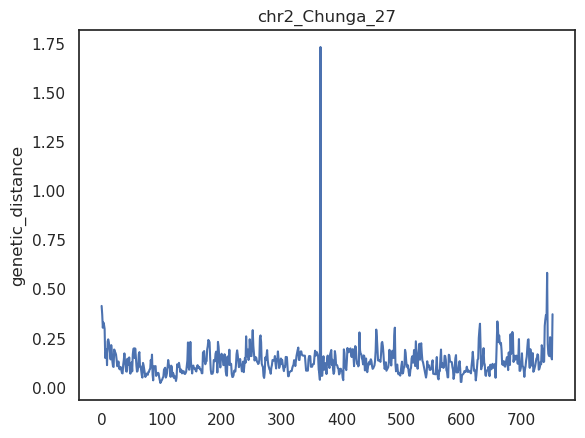

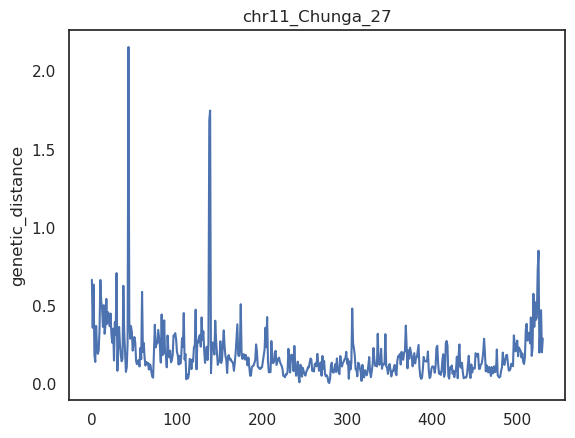

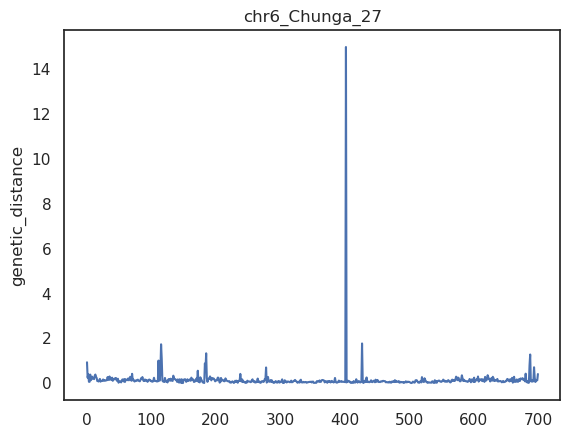

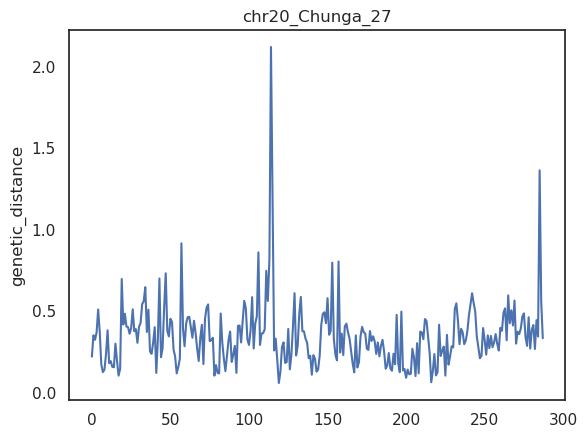

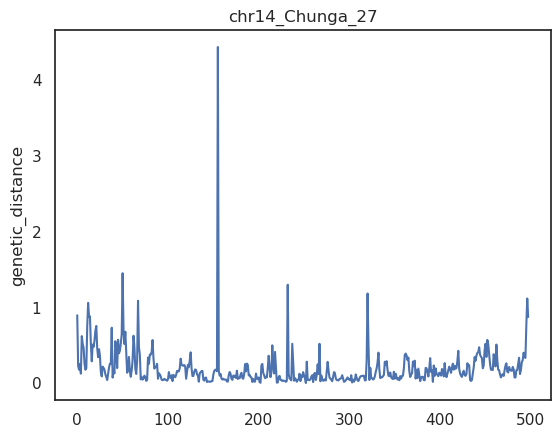

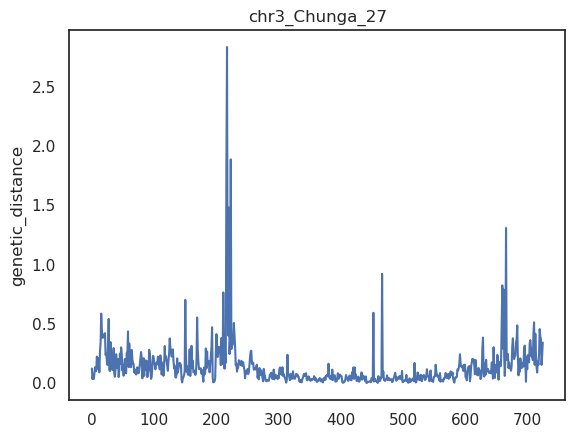

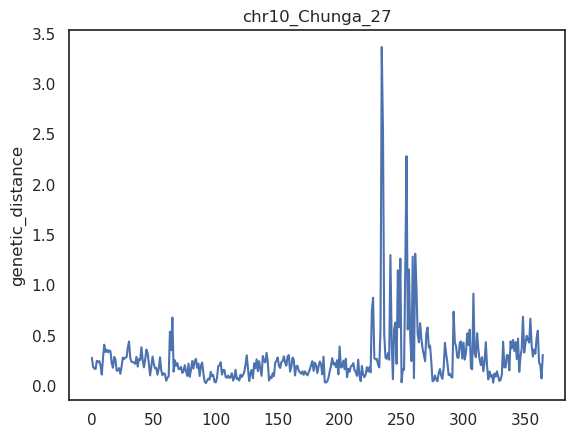

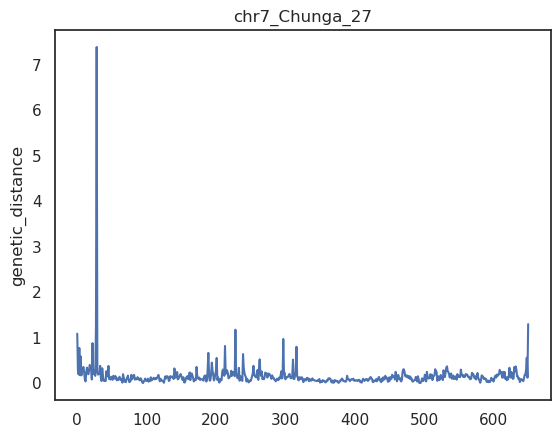

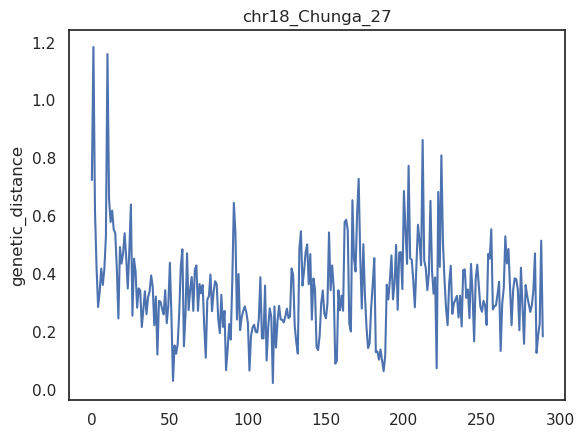

<Figure size 640x480 with 0 Axes>

In [40]:
window_size = 250000
p = pop_recombs.iloc[0, 4]
for c in pop_recombs.chrom.unique():
    chrom_df = pop_recombs.loc[(pop_recombs.chrom == c)]
    total_size = chrom_df.genetic_distance.sum()
    window_sums = chrom_df.groupby(pd.cut(chrom_df.start,np.arange\
                                          (0, chrom_df.start.max(), window_size))).sum().genetic_distance*100/total_size
    fig = sns.lineplot(y = window_sums,
                x = list(range(len(window_sums))))
    sample_number = len(meta_data_samples.loc[meta_data_samples.simple_pop == p])
    fig.set(title = "{}_{}_{}".format(c, p, sample_number))
    plt.figure()

Section generating a constant population size estimate using the maps for a single population (Mikumi)

In [1]:
%run ../scripts/notebook_settings_lean.py


chromosome_numbers = ['chr{}'.format(x) for x in range(1, 21)] + ['chrX']
hist_path = "../smcpp_pyrho/plots/{}_Mikumiplot.csv"
Ne_dict = {}
for chrom in chromosome_numbers:
    pop_hist = pd.read_csv(hist_path.format(chrom))
    harm_Ne = 1000000
    denom_Ne = 0
    minimal_Ne = harm_Ne
    for i, row in pop_hist.iterrows():
        if row.x/6 < harm_Ne:
            denom_Ne += (pop_hist.iloc[i+1].x-row.x)/row.y
            harm_Ne = 1/(denom_Ne/pop_hist.iloc[i+1].x)
            minimal_Ne = min(minimal_Ne, harm_Ne)
    Ne_dict[chrom] = harm_Ne
    print(minimal_Ne, harm_Ne)

38261.659170435276 87193.0023479335
16084.895223789365 76610.9226566886
51083.027659350424 89536.1981133083
34817.84889439948 90609.10191297861
8833.602224918603 88910.57623751553
39255.7420541673 89155.07168144817
27191.96366799794 93502.3421967234
38009.027579457776 88675.32847206175
30472.111086757443 78866.20208292772
39192.308557111355 77814.90058478556
26531.03168025586 84895.26011447808
4879.479078631037 83654.9333163401
35798.46501465831 98594.06863860204
50342.589167137194 85415.30894385085
41764.025334082115 83376.46847207827
28152.50098983259 75961.25378329457
32004.76482046014 116296.44593005259
4743.686712674567 110865.47237985647
38331.328340729124 95209.13809106043
36304.63993244899 87270.27166880229
12589.47697720761 12589.47697720761


In [ ]:
chromosome_numbers = ['chr{}'.format(x) for x in range(1, 21)] + ["chrX"]
hist_path = "../smcpp_pyrho/plots/{}_Mikumiplot.csv"
Ne_dict = {}
for chrom in chromosome_numbers:
    pop_hist = pd.read_csv(hist_path.format(chrom))
    denom_Ne = 0
    for i, row in pop_hist.iterrows():
        if i == 100:
            break
        denom_Ne += (pop_hist.iloc[i+1].x-row.x)/row.y
        harm_Ne = 1/(denom_Ne/pop_hist.iloc[i+1].x)
        #print(harm_Ne)
    Ne_dict[chrom] = harm_Ne
    print(harm_Ne)

In [ ]:
pop_hist_flat = pop_hist.copy()

In [ ]:
pop_hist_flat.y = 100000

In [ ]:
pop_hist_flat.to_csv("../smcpp_pyrho/plots/Flat100000_Mikumiplot.csv", index=False)